# Homework 3 Part 2

**Due: Wednesday, March 16, 11:59 PM**

* This is an individual assignment.

# Problem 1

In this data you will working with the [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine):

In [3]:
from sklearn.datasets import load_wine
wine = load_wine(return_X_y=False)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Let's load this data into a ```pandas``` dataframe:

In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.hstack((wine.target[:,np.newaxis],wine.data)), columns=['Class']+wine.feature_names)
df

,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Answer the following questions:

1. Implement k-Means for the 13 wine features. Use the silhouette index to determine which value of $k$ best works for this data. Justify your answer.

2. For the *optimal* value of $k$ found in the previous question, predict the clustering labels. Compute the rand index for these estimated labels vs the true labels.

In [198]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as s_score
from sklearn.metrics import rand_score

In [199]:
labels = df['Class'].to_numpy()
features = df.iloc[:, 1:].to_numpy()

In [200]:
for k in range(2,10):
    km = KMeans(k).fit(features)
    score = s_score(features, km.labels_)
    print('K val: ', k, "|", score)

K val:  2 | 0.6568536504294319
K val:  3 | 0.5711381937868844
K val:  4 | 0.5620323449580352
K val:  5 | 0.5222431198982181
K val:  6 | 0.5656413100386389
K val:  7 | 0.5621677013863717
K val:  8 | 0.5398971441034137
K val:  9 | 0.5279415465513754


In [201]:
# Optimal k value determined from k means = 2
optimal_k = 2
km = KMeans(optimal_k).fit(features)

In [202]:
r_score = rand_score(labels, km.labels_)
r_score

0.670285025074589

# Problem 2

Build a Python function to implement the $k$-Nearest Neighbors ($k$-NN) algorithm using Euclidean distance. 

* You should code this function on your own.
* You are allowed to use any needed functions from ```numpy```.
* You are allowed to use the function ```cdist``` from ```scipy.spatial.distance```.

In [196]:
from scipy.spatial.distance import cdist

In [197]:
def kNN(x_test,x_train,t_train,k=2):
    pred_labels = []
    dists = np.array(cdist(x_test, x_train))
    k_dists = np.argsort(dists, axis=1)[:,:k]
    for closest in k_dists:
        labels = t_train[closest]
        v, c = np.unique(labels, return_counts=True)
        ind = np.argmax(c)
        pred_labels.append(v[ind])
    return np.array(pred_labels)

# Problem 3
In this problem you will be working with **Breast cancer wisconsin (diagnostic) dataset** from the UCI ML repository, also available in ```scikit-learn```. Let's load the data:

In [150]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer(return_X_y=False)

print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

For this problem, you will only be working with the radius and texture features:

In [191]:
X = dataset.data[:,:2]
y = dataset.target

Answer the following questions:

1. Partition the data into training and test using 70/30 partition, respectively.

2. Train a Naive Bayes Classifier using the training data. Using the test data, evaluate the classifier performance using accuracy and confusion matrix.

3. Train a $k$-NN classifier with $k=3$ using the training data. Using the test data, evaluate the classifier performance using accuracy and confusion matrix.

4. From the results you obtained in 2 and 3, which model performs best? Explain your reasoning.

5. Implement 4-fold cross-validation to find out the best value of $k$ that maximizes the model's accuracy.


Utils:
* You can use the functions ```confusion_matrix``` and ```accuracy_score``` from the module ```sklearn.metrics```.
* You can use the functions ```train_test_split``` and ```KFold``` from the module ```sklearn.model_selection```.

In [219]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, KFold
?confusion_matrix

In [184]:
x_train, x_test, t_train, t_test = train_test_split(X, y, train_size=0.7)

In [221]:
pred_labels_NB = GaussianNB().fit(x_train, t_train).predict(x_test)
cm_NB = confusion_matrix(t_test,pred_labels_NB)
score_NB = accuracy_score(t_test, pred_labels_NB)

print(cm_NB)
print(score_NB)

[[54 16]
 [ 4 97]]
0.8830409356725146


In [222]:
pred_labels_kNN = kNN(x_test, x_train, t_train, k=3)
cm_kNN = confusion_matrix(t_test, pred_labels_kNN)
score_kNN = accuracy_score(t_test, pred_labels_kNN)

print(cm_kNN)
print(score_kNN)

[[58 12]
 [11 90]]
0.8654970760233918


The Naive Bayes classifier had a higher accuracy score than kNN did for this dataset but not by much. The NB classifier scored ~88.3% accuracy while kNN scored ~86.55%. This could be in part due to the noise in the dataset. kNN doesn't account for the underlying statistical properties of the data that it is classifying so, noise in the data could be attributed to the misclassifications. A higher k value may be able to overcome the noise in the data and allow for a more accurate classification. NB accounts for the variance in the data so it may have a more accurate reading if the data is spread in a way that is better predicted with circular Gaussian distribution.

In [272]:
k_range = 30

In [283]:
splits = 4
kf = KFold(n_splits=splits, shuffle=True)
avg_accuracy = []
for k in range(2,k_range):
    accuracy = 0
    for train_i, val_i in kf.split(x_train):
        x_train_fold = x_train[train_i]
        t_train_fold = t_train[train_i]
        x_val = x_train[val_i]
        t_val = t_train[val_i]
        
        pred_labels = kNN(x_val, x_train_fold, t_train_fold, k)
        accuracy += accuracy_score(t_val, pred_labels)
        
    avg_accuracy.append(np.array([k, accuracy/splits]))

In [284]:
avg_accuracy = np.array(avg_accuracy)
k_best, accuracy = avg_accuracy[np.argmax(avg_accuracy[:,1])]

In [285]:
print(f'Best k = {k_best} | {accuracy}')

Best k = 18.0 | 0.9095959595959595


# Problem 4

Consider the following data in a 2-dimensional feature space, $x_1$ and $x_2$, and its corresponding labels, $t$:

|$x_1$|$x_2$|$t$|
|--|--|--|
|0|0|0|
|0.1|0|0|
|-0.1|0.1|0|
|0.05|0.1|0|
|-0.1|0|0|
|0.05|-0.1|0|
|1|1|1|
|1.2|0.9|1|
|0.9|1.1|1|
|0.8|0.9|1|
|2|1|1|
|1.5|0.9|1|

Answer the following questions:

1. Find the Fisher's linear discriminant function. 

2. Specify all the parameters of the discriminant. 

In [105]:
#CODE HEAVILY INSPIRED BY IN-CLASS EDITS W/ SLIGHT MODIFICATIONS
#Had a lot of trouble with manipulating the variables to be in the correct
#shape to perform some of the computations

In [92]:
import matplotlib.pyplot as plt
import numpy as np

In [93]:
import matplotlib.pyplot as plt
x = np.array([[0,0],[0.1,0],[-0.1,0.1],[0.05,0.1],[-0.1,0],[0.05,-0.1],[1,1],[1.2,0.9],[0.9,1.1],[0.8,0.9],[2,1],[1.5,0.9]])
labels = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

print(x.shape)
print(labels.shape)

(12, 2)
(12,)


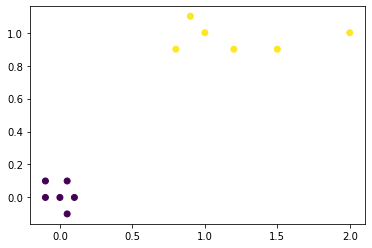

In [94]:
plt.scatter(x[:,0], x[:,1], c = labels);

In [95]:
c_a = x[labels==0]
c_b = x[labels==1]

In [102]:
mean_a = np.atleast_2d(np.mean(c_a, axis=0))
mean_b = np.atleast_2d(np.mean(c_b, axis=0))
Sw_a = np.dstack([(c_a[i]-mean_a).T@(c_a[i]-mean_a) for i in range(c_a.shape[0])])
Sw_b = np.dstack([(c_b[i]-mean_b).T@(c_b[i]-mean_b) for i in range(c_b.shape[0])])
Sw = np.sum(Sw_a, axis=2)+np.sum(Sw_b, axis=2)

w = np.linalg.inv(Sw)@(mean_b-mean_a).T
w = w/np.linalg.norm(w)
print(w)

[[0.09541778]
 [0.99543731]]


In [103]:
def discriminant(data, labels, v):
    v_perp = np.array([v[1], -v[0]])
    b = ((np.mean(data[labels==0,:],axis=0)+np.mean(data[labels==1,:],axis=0))/2)@v
    lambda_proj = np.linspace(-0.5,1.5,len(data))
    lambda_dis = np.linspace(-0.5,2,len(data))
    v_line = lambda_proj * v
    decision_boundary = b * v + lambda_dis * v_perp
    return v_line, decision_boundary

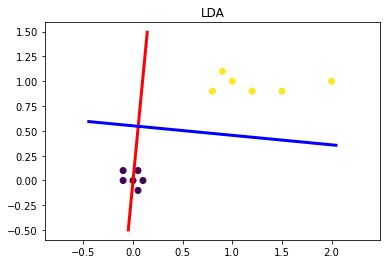

In [104]:
v_line, d_boundary = discriminant(x, labels, w);


plt.scatter(x[:,0], x[:,1], c=labels)
plt.plot(v_line[0], v_line[1], 'red', linewidth=3)
plt.plot(d_boundary[0,:], d_boundary[1,:],'blue',linewidth=3)
plt.title('LDA'); plt.axis('equal');

The parameters in LDA are w and b, both of which describe the discriminant line. b is the y-intercept, which lies at the average of the projected means and w which specifies the slope of the line which is perpendicular to the line of projection.

## Submit your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.